# How to use the functions related to the MGF in the repository in the right way?

First, it's important to import some of the modules that have been built.

In [1]:
from src.utils import *
from scripts.process_mgf import *
from scripts.plot_mgf import *

Then add the path of the **.mgf** file. You can also check that there are no errors with the path.

In [2]:
mgf_data = r"/Users/carla/PycharmProjects/Mestrado/Transformer-Based-Models-for-Chemical-Fingerprint-Prediction/data/raw/cleaned_gnps_library.mgf"

path_check(mgf_data)

File found!


Then, to ensure that the iteration is taking place correctly over the spectra, you can use the information reading functions:

- validate_mgf_structure
- mgf_read_headers
- mgf_read_all

In [3]:
validate_mgf_structure(mgf_data)


Total number of spectra found: 459426
Missing SCANS: 0
Missing SPECTRUM_ID: 0
Duplicate SCANS: 49616 -> ['1', '2', '3', '4', '5']...
Duplicate SPECTRUM_ID: 0 -> []...


In [4]:
mgf_read_headers(mgf_data=mgf_data, num_spectra=1)

Spectrum 1 - Parameters:
{'charge': [1], 'ionmode': 'positive', 'smiles': 'CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=O)C(C)C(NC(=O)C(CCCNC(N)=N)NC(=O)C(C)C(NC1=O)C(O)=O)\\C=C\\C(\\C)=C\\C(C)C(O)Cc1ccccc1)C(O)=O', 'scans': '1', 'ms_level': '2', 'instrument_type': 'LC-ESI-qTof', 'file_name': '130618_Ger_Jenia_WT-3-Des-MCLR_MH981.4-qb.1.1..mgf', 'peptide_sequence': '*..*', 'organism_name': 'GNPS-LIBRARY', 'compound_name': '3-Des-Microcystein_LR', 'principal_investigator': 'Gerwick', 'data_collector': 'Jenia', 'submit_user': 'mwang87', 'confidence': '1', 'spectrum_id': 'CCMSLIB00000001547', 'precursor_mz': '981.54', 'adduct': '[M+H]+', 'inchikey': 'IYDKWWDUBYWQGF-NNAZGLEUSA-N', 'inchi': 'InChI=1S/C48H72N10O12/c1-25(2)22-36-45(66)57-39(47(69)70)29(6)41(62)54-34(16-13-21-51-48(49)50)44(65)53-33(18-17-26(3)23-27(4)37(59)24-32-14-11-10-12-15-32)28(5)40(61)55-35(46(67)68)19-20-38(60)58(9)31(8)43(64)52-30(7)42(63)56-36/h10-12,14-15,17-18,23,25,27-30,33-37,39,59H,8,13,16,19-22,24H2,1-7,9H3,(H

In [5]:
mgf_read_all(mgf_data=mgf_data, num_spectra=1)

Spectrum 1 - Parameters:
{'charge': [1], 'ionmode': 'positive', 'smiles': 'CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=O)C(C)C(NC(=O)C(CCCNC(N)=N)NC(=O)C(C)C(NC1=O)C(O)=O)\\C=C\\C(\\C)=C\\C(C)C(O)Cc1ccccc1)C(O)=O', 'scans': '1', 'ms_level': '2', 'instrument_type': 'LC-ESI-qTof', 'file_name': '130618_Ger_Jenia_WT-3-Des-MCLR_MH981.4-qb.1.1..mgf', 'peptide_sequence': '*..*', 'organism_name': 'GNPS-LIBRARY', 'compound_name': '3-Des-Microcystein_LR', 'principal_investigator': 'Gerwick', 'data_collector': 'Jenia', 'submit_user': 'mwang87', 'confidence': '1', 'spectrum_id': 'CCMSLIB00000001547', 'precursor_mz': '981.54', 'adduct': '[M+H]+', 'inchikey': 'IYDKWWDUBYWQGF-NNAZGLEUSA-N', 'inchi': 'InChI=1S/C48H72N10O12/c1-25(2)22-36-45(66)57-39(47(69)70)29(6)41(62)54-34(16-13-21-51-48(49)50)44(65)53-33(18-17-26(3)23-27(4)37(59)24-32-14-11-10-12-15-32)28(5)40(61)55-35(46(67)68)19-20-38(60)58(9)31(8)43(64)52-30(7)42(63)56-36/h10-12,14-15,17-18,23,25,27-30,33-37,39,59H,8,13,16,19-22,24H2,1-7,9H3,(H

And check if any of the spectra does not have a **valid ID**.

In [6]:
check_spectrum_ids(mgf_data)

All spectra have valid IDs


After the above checks, you can collect information on each spectrum with the function, **mgf_get_spectra**.

In [7]:
mgf_spect= mgf_get_spectra(mgf_data)

Once the data has been collected, it is also important to check the format of the data in the output. 

If it's more than 1 spectrum, it must be a dictionary. If it's only 1 spectrum, it should be a list.

In [8]:
type(mgf_spect)

list

After loading the data, we can do a little exploratory analysis of the data and metadata in the file.

First you can check the number of compounds and type of ionisation modes using **check_mgf_data**. It is also important to check whether the number of compounds matches the number of spectra found by the **validate_mgf_structure** function.

In [8]:
check_mgf_data(mgf_spect)

{'Total compounds': 459426,
 'Unique compounds': 49059,
 'Unknown compounds': 1486,
 'Positive ionization mode': 379652,
 'Negative ionization mode': 79774,
 'Unknown ionization mode': 0}

You can also see the distribution of spectra by compound using **plot_spectra_distribution**.

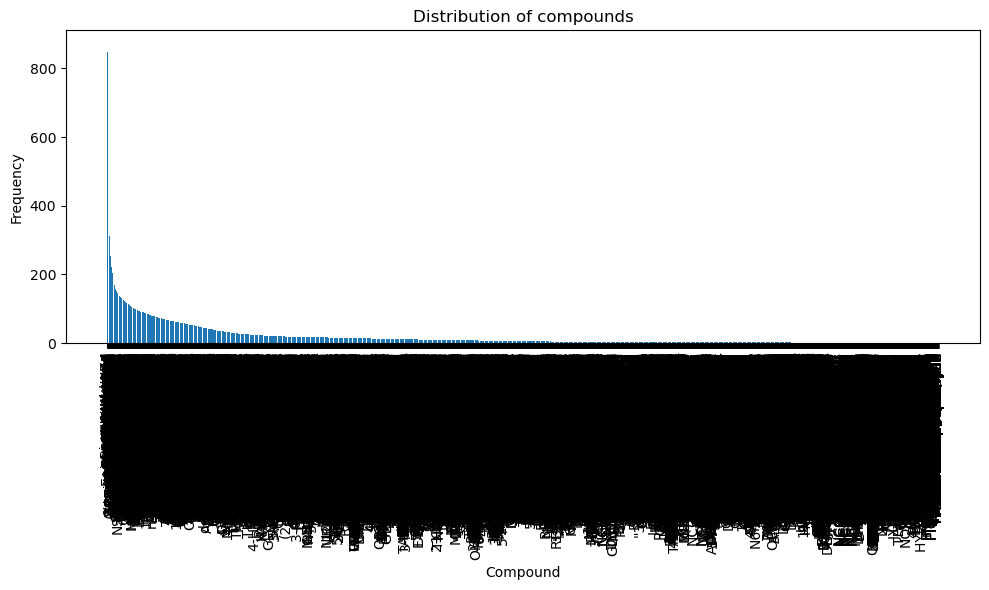

In [9]:
plot_spectra_distribution(spectra=mgf_spect, top_percent=95)

And some information about m/z and the number of peaks in the spectra using **check_mgf_spectra**.

In [10]:
check_mgf_spectra(mgf_spect)

{'m/z range': (0.0008, 4971.122559),
 'peak count stats': {'min': 1,
  'max': 10000,
  'mean': 99.09948496710906,
  'median': 14.0}}

After the exploratory analysis, you can plot the spectra.

If the data collected is a dictionary (1 spectrum), you should use the function **plot_spectrum** to visualize it.

In [9]:
plot_spectrum(mgf_spect)

If the data collected is a list (more than 1 spectrum), you should use the function **plot_spectra** to visualize it.

Plotting Spectra:   0%|          | 0/1 [00:00<?, ?spectrum/s]

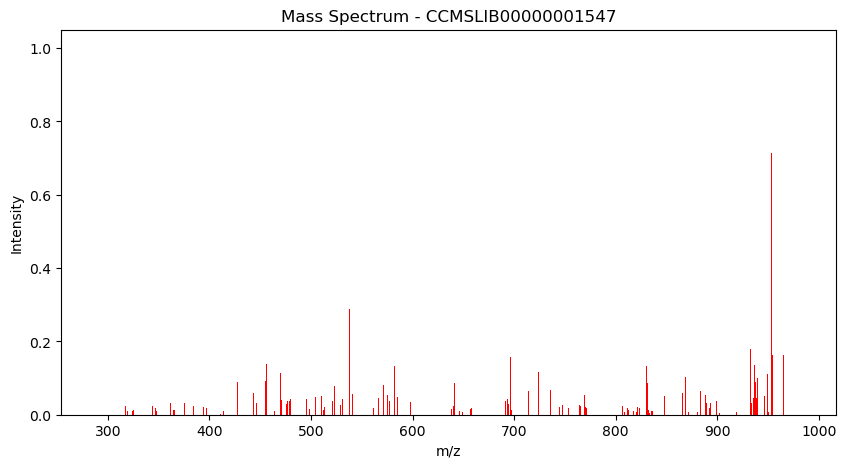

Plotting Spectra: 100%|██████████| 1/1 [00:00<00:00,  3.16spectrum/s]


In [11]:
plot_spectra(mgf_spect, num_spectra=1)

In addition, it is possible to isolate and obtain the SMILES of the molecules within the .mgf file.

In [3]:
data = mgf_get_smiles(mgf_data, num_spectra=25)

In [ ]:
"""
Deconvoluter test

for i, spec in enumerate(spectra):
    resultado = mgf_spectrum_deconvoluter(
        (i, spec),
        MIN_NUM_PEAKS=5,
        MAX_NUM_PEAKS=1000,
        NOISE_REMOVAL_THRESHOLD=0.01,
        allowedSpectralEntropy=5.0,
        mass_error=0.01,
        mz_vocabs=mz_vocabs,
        export_parameters={},
        logMINT=True
    )
"""